<a href="https://colab.research.google.com/github/pa7003/Financial-Data-Analysis-and-Forecasting/blob/main/Financial_Data_Analysis_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install & Import Libraries

In [1]:
# Install yfinance
!pip install yfinance

# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Download S&P 500 Data

In [2]:
# Download S&P 500 index data from 2010 to present
sp500 = yf.download('^GSPC', start='2010-01-01', end='2025-06-30')

# Check the first few rows
print(sp500.head())

# Save to CSV (optional)
sp500.to_csv('sp500_data.csv')

/tmp/ipython-input-2-3346393326.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2010-01-01', end='2025-06-30')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2010-01-04  1132.989990  1133.869995  1116.560059  1116.560059  3991400000
2010-01-05  1136.520020  1136.630005  1129.660034  1132.660034  2491020000
2010-01-06  1137.140015  1139.189941  1133.949951  1135.709961  4972660000
2010-01-07  1141.689941  1142.459961  1131.319946  1136.270020  5270680000
2010-01-08  1144.979980  1145.390015  1136.219971  1140.520020  4389590000


## Step 3: Data Cleaning Check

In [3]:
# Check missing values
print(sp500.isnull().sum())

# Data types and info
print(sp500.info())

# Summary statistics
print(sp500.describe())

Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3895 entries, 2010-01-04 to 2025-06-27
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   3895 non-null   float64
 1   (High, ^GSPC)    3895 non-null   float64
 2   (Low, ^GSPC)     3895 non-null   float64
 3   (Open, ^GSPC)    3895 non-null   float64
 4   (Volume, ^GSPC)  3895 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 182.6 KB
None
Price         Close         High          Low         Open        Volume
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC         ^GSPC
count   3895.000000  3895.000000  3895.000000  3895.000000  3.895000e+03
mean    2823.974652  2838.660039  2806.957910  2823.330128  3.974840e+09
std     1355.858757  1363.056510  1347.751700  1355.588563  9.749768e+08
min 

## Step 4: EDA

### 1: Plot Closing Price

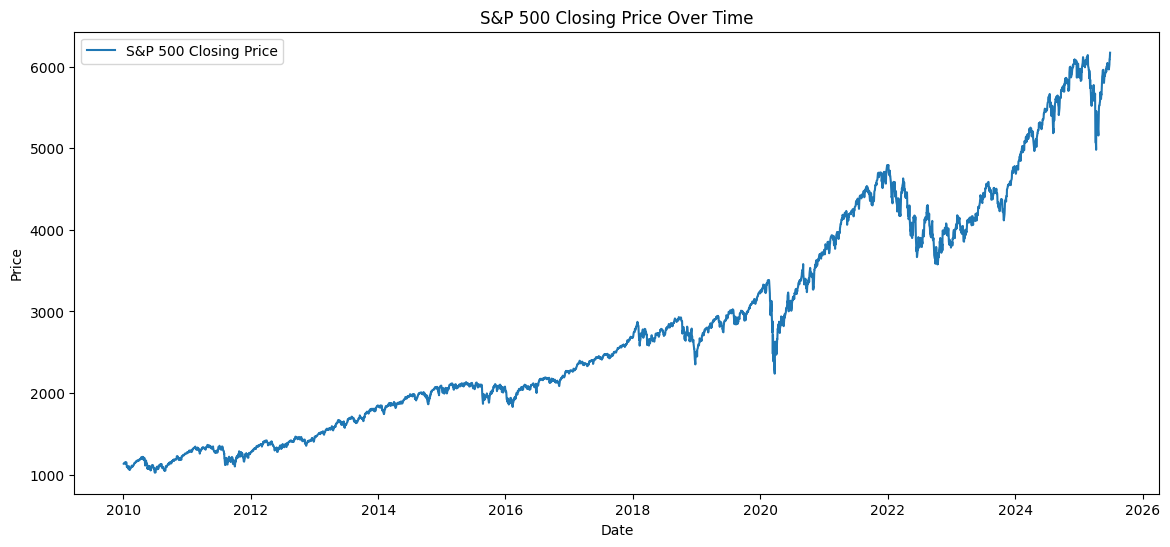

In [4]:
plt.figure(figsize=(14,6))
plt.plot(sp500.index, sp500['Close'], label='S&P 500 Closing Price')
plt.title('S&P 500 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 2: Moving Averages

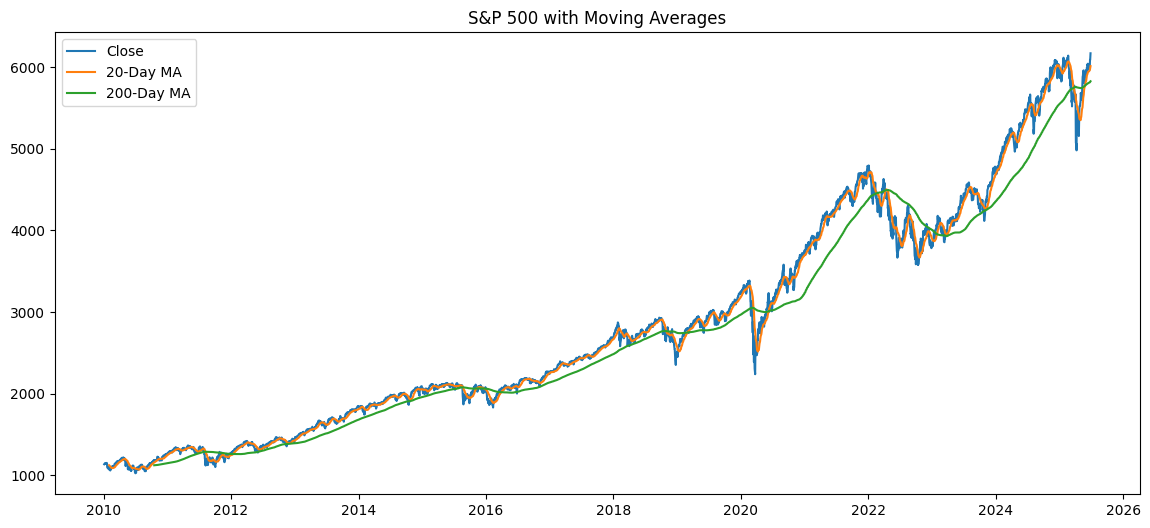

In [5]:
sp500['20_MA'] = sp500['Close'].rolling(window=20).mean()
sp500['200_MA'] = sp500['Close'].rolling(window=200).mean()

plt.figure(figsize=(14,6))
plt.plot(sp500['Close'], label='Close')
plt.plot(sp500['20_MA'], label='20-Day MA')
plt.plot(sp500['200_MA'], label='200-Day MA')
plt.title('S&P 500 with Moving Averages')
plt.legend()
plt.show()

### 3: Daily Returns

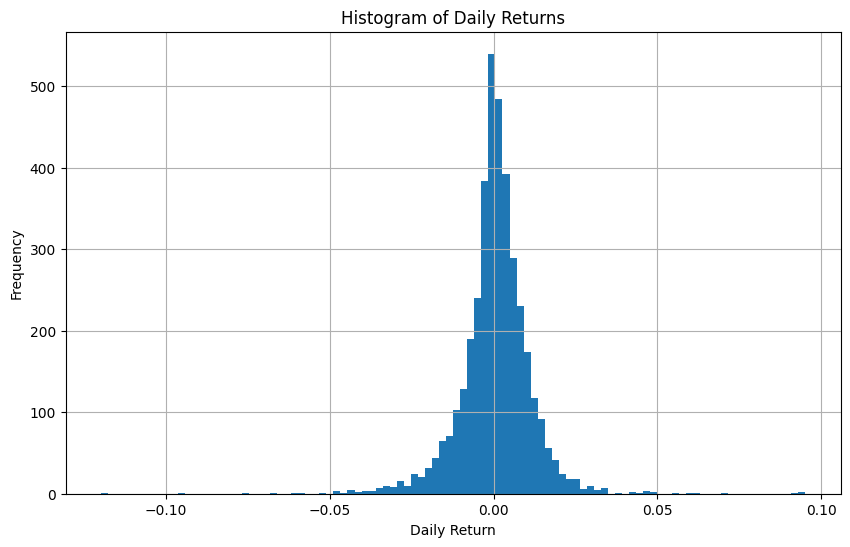

In [6]:
sp500['Daily_Return'] = sp500['Close'].pct_change()

plt.figure(figsize=(10,6))
sp500['Daily_Return'].hist(bins=100)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

### 4: Rolling Volatility

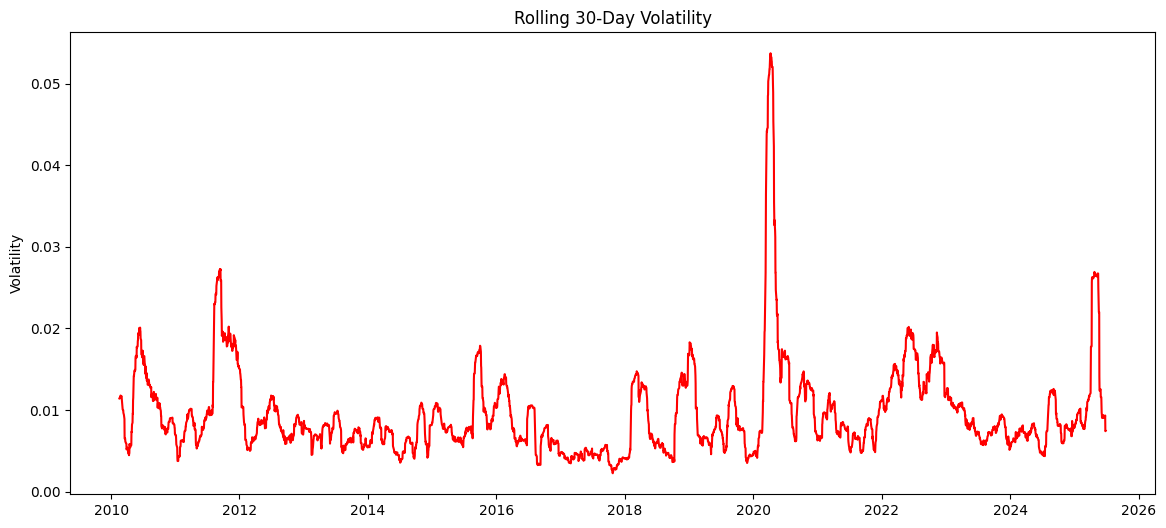

In [7]:
sp500['Volatility'] = sp500['Daily_Return'].rolling(window=30).std()

plt.figure(figsize=(14,6))
plt.plot(sp500['Volatility'], color='red')
plt.title('Rolling 30-Day Volatility')
plt.ylabel('Volatility')
plt.show()

### 5: Bollinger Bands

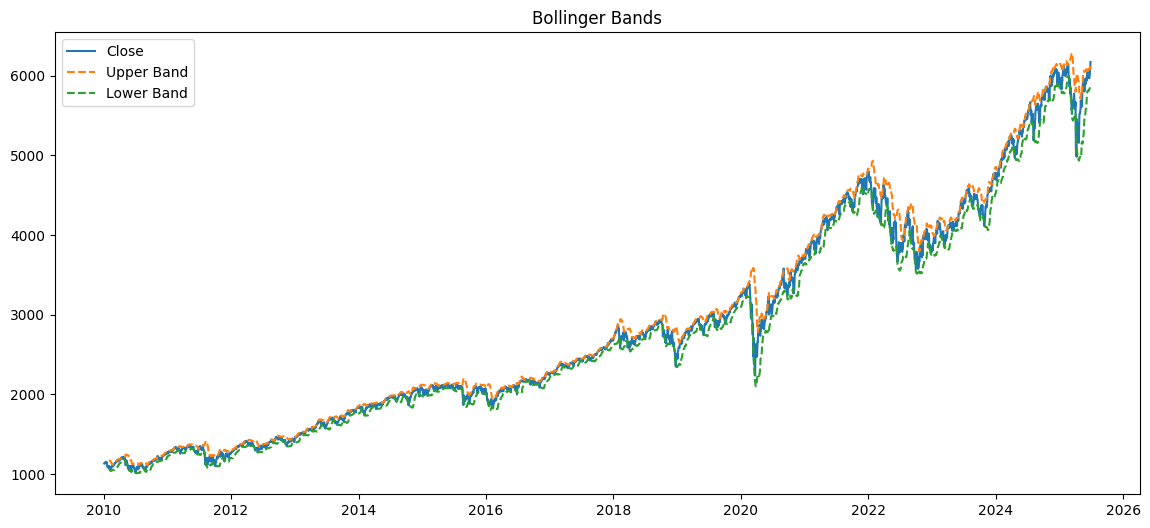

In [8]:
# Calculate Bollinger Bands
sp500['20_SMA'] = sp500['Close'].rolling(window=20).mean()
sp500['20_STD'] = sp500['Close'].rolling(window=20).std()
sp500['Upper'] = sp500['20_SMA'] + (2 * sp500['20_STD'])
sp500['Lower'] = sp500['20_SMA'] - (2 * sp500['20_STD'])

plt.figure(figsize=(14,6))
plt.plot(sp500['Close'], label='Close')
plt.plot(sp500['Upper'], label='Upper Band', linestyle='--')
plt.plot(sp500['Lower'], label='Lower Band', linestyle='--')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

### 6. Volume Pattern Analysis

✔️ Plot Volume Over Time

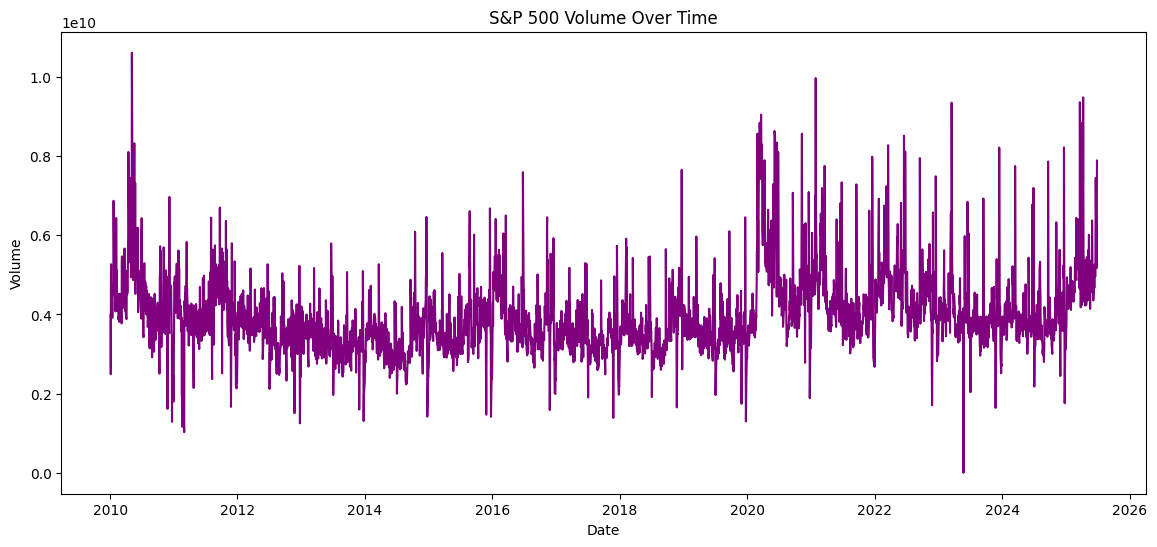

In [9]:
plt.figure(figsize=(14,6))
plt.plot(sp500.index, sp500['Volume'], color='purple')
plt.title('S&P 500 Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

✔️ Volume with Price Together

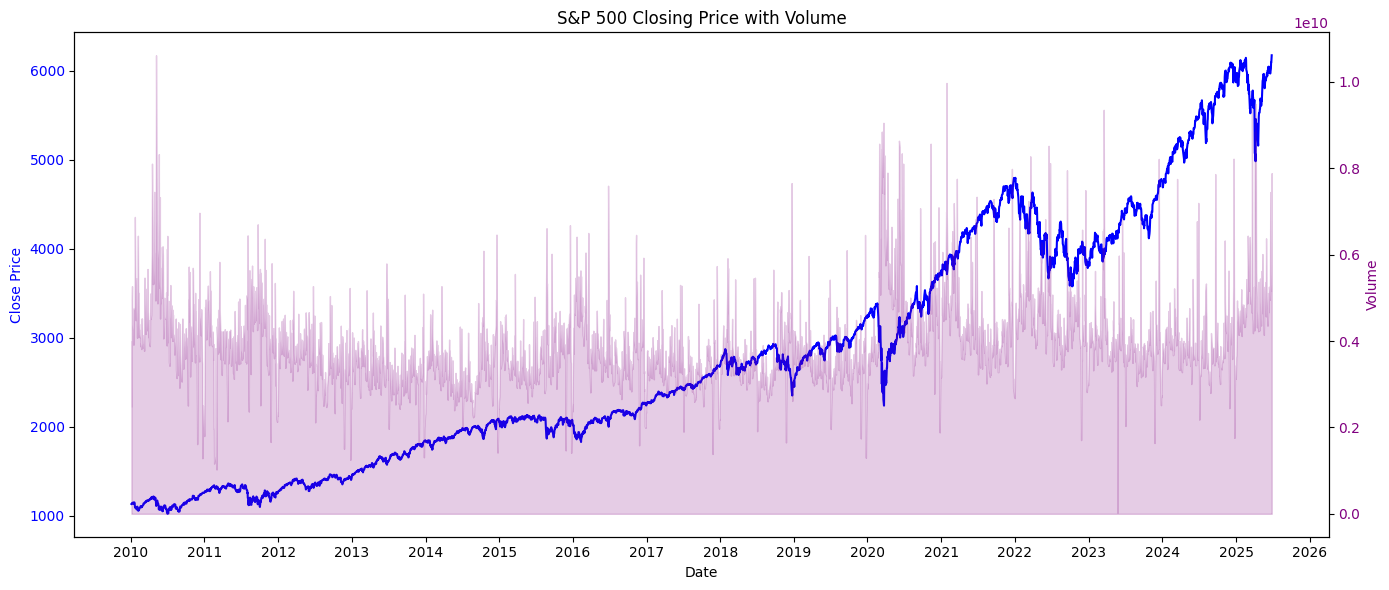

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(14,6))

# Plot Close Price
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(sp500.index, sp500[('Close', '^GSPC')], color='blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Twin axis for Volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='purple')

# Plot Volume as area
ax2.fill_between(sp500.index, sp500[('Volume', '^GSPC')].values,
                 color='purple', alpha=0.2, label='Volume')

ax2.tick_params(axis='y', labelcolor='purple')

# Date formatting
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('S&P 500 Closing Price with Volume')
fig.tight_layout()
plt.show()

### 7. Trend Reversal Detection: Golden Cross & Death Cross

✔️ Identify Crossovers:

/tmp/ipython-input-12-2721846532.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['Signal'][20:] = np.where(sp500['20_MA'][20:] > sp500['200_MA'][20:], 1.0, 0.0)


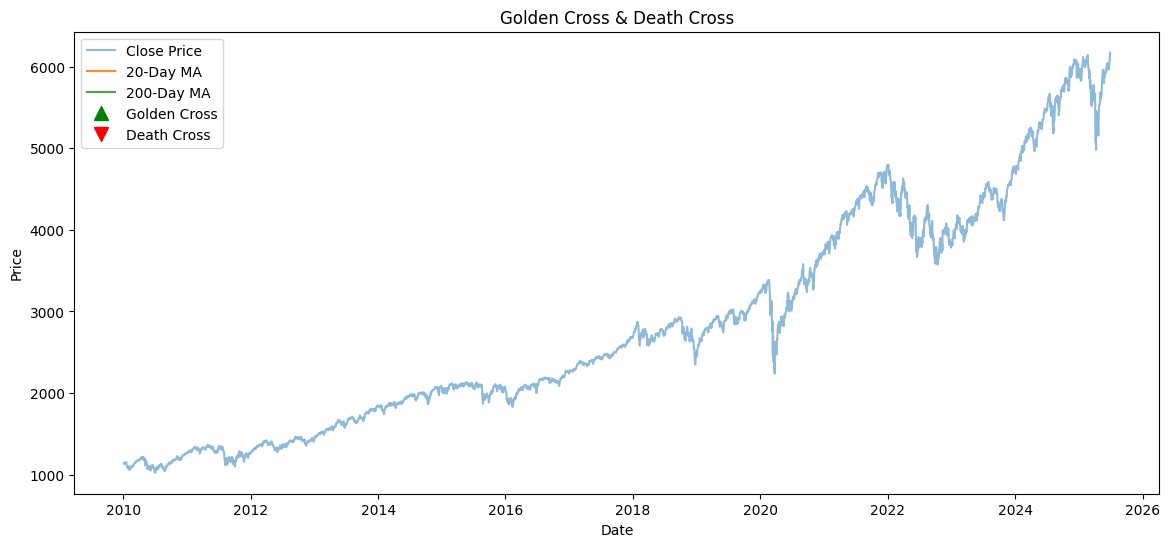

In [12]:
import numpy as np
# Calculate Moving Averages
sp500['20_MA'] = sp500['Close'].rolling(window=20).mean()
sp500['200_MA'] = sp500['Close'].rolling(window=200).mean()

# Create a signal column
sp500['Signal'] = 0.0
sp500['Signal'][20:] = np.where(sp500['20_MA'][20:] > sp500['200_MA'][20:], 1.0, 0.0)

# Generate trading positions
sp500['Position'] = sp500['Signal'].diff()

# Plot
plt.figure(figsize=(14,6))
plt.plot(sp500['Close'], label='Close Price', alpha=0.5)
plt.plot(sp500['20_MA'], label='20-Day MA', alpha=0.9)
plt.plot(sp500['200_MA'], label='200-Day MA', alpha=0.9)

# Plot Golden Cross
plt.plot(sp500[sp500['Position'] == 1].index,
         sp500['20_MA'][sp500['Position'] == 1],
         '^', markersize=10, color='g', label='Golden Cross')

# Plot Death Cross
plt.plot(sp500[sp500['Position'] == -1].index,
         sp500['20_MA'][sp500['Position'] == -1],
         'v', markersize=10, color='r', label='Death Cross')

plt.title('Golden Cross & Death Cross')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Step 5: Statistical Analysis

### 1. Returns Calculation (Deep Analysis)

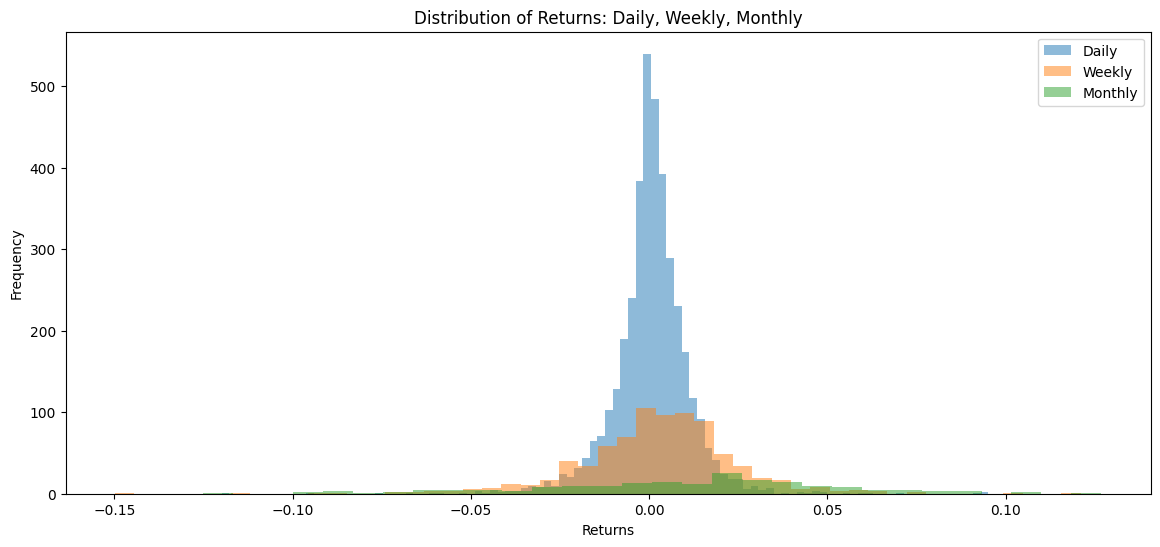

In [13]:
# Daily Returns
daily_return = sp500['Close'].pct_change().dropna()

# Weekly Returns
weekly_return = sp500['Close'].resample('W').ffill().pct_change().dropna()

# Monthly Returns
monthly_return = sp500['Close'].resample('ME').ffill().pct_change().dropna() # Changed 'M' to 'ME'

# Plot all returns
plt.figure(figsize=(14,6))
plt.hist(daily_return, bins=100, alpha=0.5, label='Daily')
plt.hist(weekly_return, bins=50, alpha=0.5, label='Weekly')
plt.hist(monthly_return, bins=30, alpha=0.5, label='Monthly')
plt.title('Distribution of Returns: Daily, Weekly, Monthly')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 2. Skewness & Kurtosis (Tail Risk Analysis)

✔️ Check Distribution Shape:

In [14]:
from scipy.stats import skew, kurtosis

# Calculate
stats = {
    'Daily': {'Skewness': skew(daily_return), 'Kurtosis': kurtosis(daily_return)},
    'Weekly': {'Skewness': skew(weekly_return), 'Kurtosis': kurtosis(weekly_return)},
    'Monthly': {'Skewness': skew(monthly_return), 'Kurtosis': kurtosis(monthly_return)}
}

# Display
import pprint
pprint.pprint(stats)

{'Daily': {'Kurtosis': array([12.70654606]), 'Skewness': array([-0.36330523])},
 'Monthly': {'Kurtosis': array([0.4723215]), 'Skewness': array([-0.3712227])},
 'Weekly': {'Kurtosis': array([5.19971687]), 'Skewness': array([-0.54125275])}}


### 3. Correlation with Volume

✔️ Check Price Movements vs. Volume:

In [15]:
# Check if 'Volume' exists
volume = sp500[('Volume', '^GSPC')].dropna()

# Recalculate daily returns and ensure it's a Series
daily_return_series = sp500['Close'].pct_change().dropna()

# Align volume to the index of daily_return_series
volume_aligned = volume.loc[daily_return_series.index]

# Ensure both are Series using squeeze()
daily_return_series = daily_return_series.squeeze()
volume_aligned = volume_aligned.squeeze()

# Correlation
correlation = daily_return_series.corr(volume_aligned)

print(f"Correlation between daily returns and volume: {correlation:.4f}")

Correlation between daily returns and volume: -0.0782


✔️ Visual Analysis:

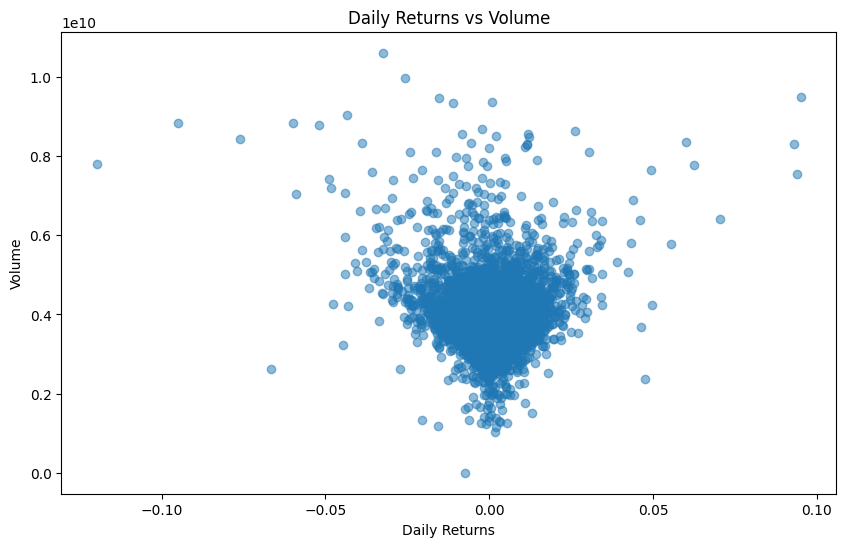

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(daily_return_series, volume_aligned, alpha=0.5) # Use the aligned Series
plt.title('Daily Returns vs Volume')
plt.xlabel('Daily Returns')
plt.ylabel('Volume')
plt.show()

### 4. Correlation Heatmap of Variables:

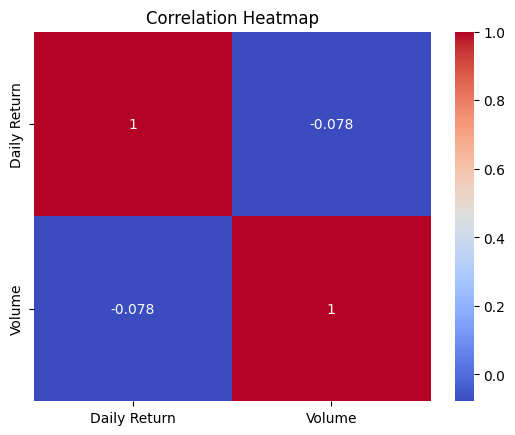

In [17]:
data_for_corr = pd.DataFrame({
    'Daily Return': daily_return_series,
    'Volume': volume_aligned
}).dropna()

corr_matrix = data_for_corr.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Step 6: Forecasting

### Step 1: Check for Stationarity

✔️ Use ADF (Augmented Dickey-Fuller) Test:

In [18]:
from statsmodels.tsa.stattools import adfuller

close_price = sp500[('Close', '^GSPC')].dropna()

# Confirm it's defined
print(close_price.head())

result = adfuller(close_price)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] < 0.05:
    print("Data is stationary — Good for ARIMA")
else:
    print("Data is NOT stationary — Differencing needed")

# Flatten Columns for Simpler Access
sp500.columns = ['_'.join(filter(None, col)).strip() for col in sp500.columns.values]
print(sp500.columns)  # Check new columns

# Now access simpler
close_price = sp500['Close_^GSPC']

Date
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
2010-01-08    1144.979980
Name: (Close, ^GSPC), dtype: float64
ADF Statistic: 1.086098115977493
p-value: 0.9950962117625562
Data is NOT stationary — Differencing needed
Index(['Close_^GSPC', 'High_^GSPC', 'Low_^GSPC', 'Open_^GSPC', 'Volume_^GSPC',
       '20_MA', '200_MA', 'Daily_Return', 'Volatility', '20_SMA', '20_STD',
       'Upper', 'Lower', 'Signal', 'Position'],
      dtype='object')


### Step 2: ARIMA Model Forecast

✔️ Fit ARIMA (auto or manual parameters):

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Close_^GSPC   No. Observations:                 3895
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -19268.318
Date:                Thu, 03 Jul 2025   AIC                          38548.635
Time:                        14:33:17   BIC                          38586.239
Sample:                             0   HQIC                         38561.983
                               - 3895                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0745      0.006    -11.648      0.000      -0.087      -0.062
ar.L2          0.0570      0.008      7.229      0.000       0.042       0.072
ar.L3         -0.0461      0.006     -7.163      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


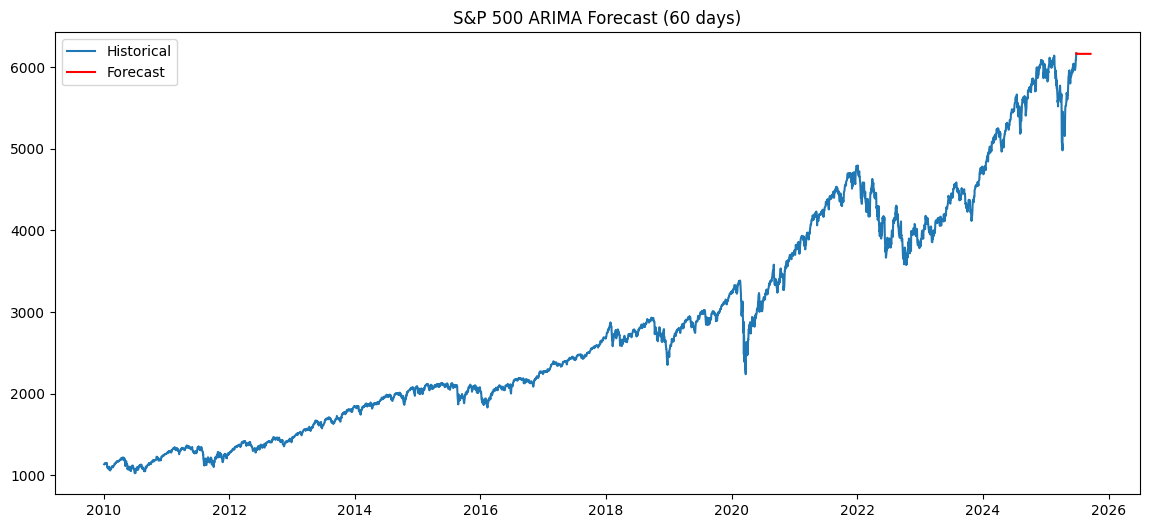

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA (p,d,q)
model = ARIMA(close_price, order=(5,1,0))  # Example order
model_fit = model.fit()

# Summary
print(model_fit.summary())

# Forecast next 60 business days
forecast = model_fit.forecast(steps=60)

# Plot
plt.figure(figsize=(14,6))
plt.plot(close_price, label='Historical')
plt.plot(pd.date_range(close_price.index[-1], periods=60, freq='B'),
         forecast, color='red', label='Forecast')
plt.title('S&P 500 ARIMA Forecast (60 days)')
plt.legend()
plt.show()

✔️ Improve with SARIMA (Seasonal ARIMA)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


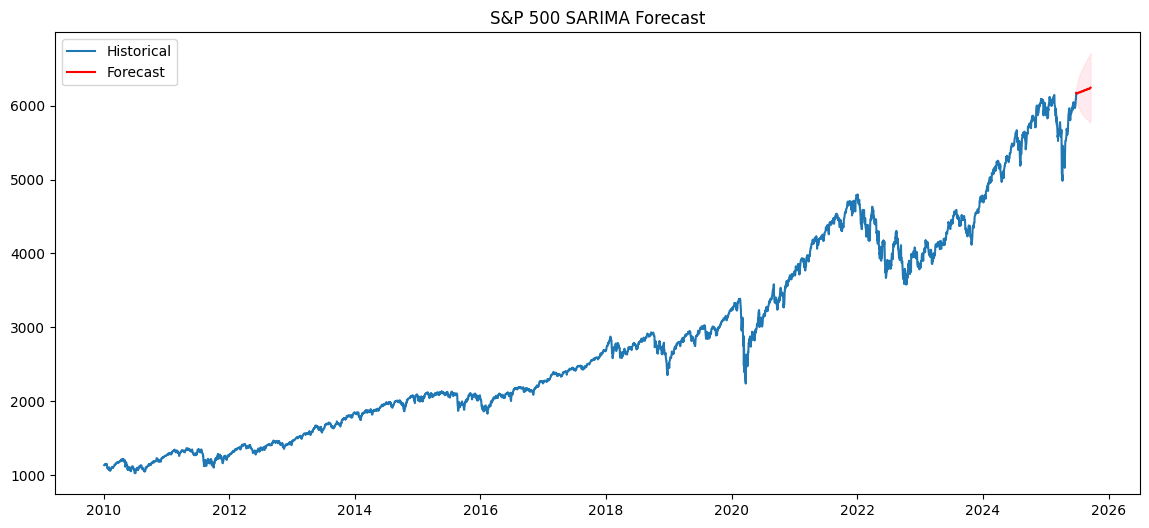

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(close_price,
                order=(5,1,0),
                seasonal_order=(1,1,1,12))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=60)
pred_ci = forecast.conf_int()

plt.figure(figsize=(14,6))
plt.plot(close_price, label='Historical')
plt.plot(pd.date_range(close_price.index[-1], periods=60, freq='B'),
         forecast.predicted_mean, label='Forecast', color='red')

plt.fill_between(pd.date_range(close_price.index[-1], periods=60, freq='B'),
                 pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='pink', alpha=0.3)

plt.title('S&P 500 SARIMA Forecast')
plt.legend()
plt.show()

### Step 3: Prophet Forecast

In [21]:
!pip install prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc38f0tyd/1lin31ux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc38f0tyd/dfgzwqak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47283', 'data', 'file=/tmp/tmpc38f0tyd/1lin31ux.json', 'init=/tmp/tmpc38f0tyd/dfgzwqak.json', 'output', 'file=/tmp/tmpc38f0tyd/prophet_model1s7z_5ol/prophet_model-20250703143420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:34:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


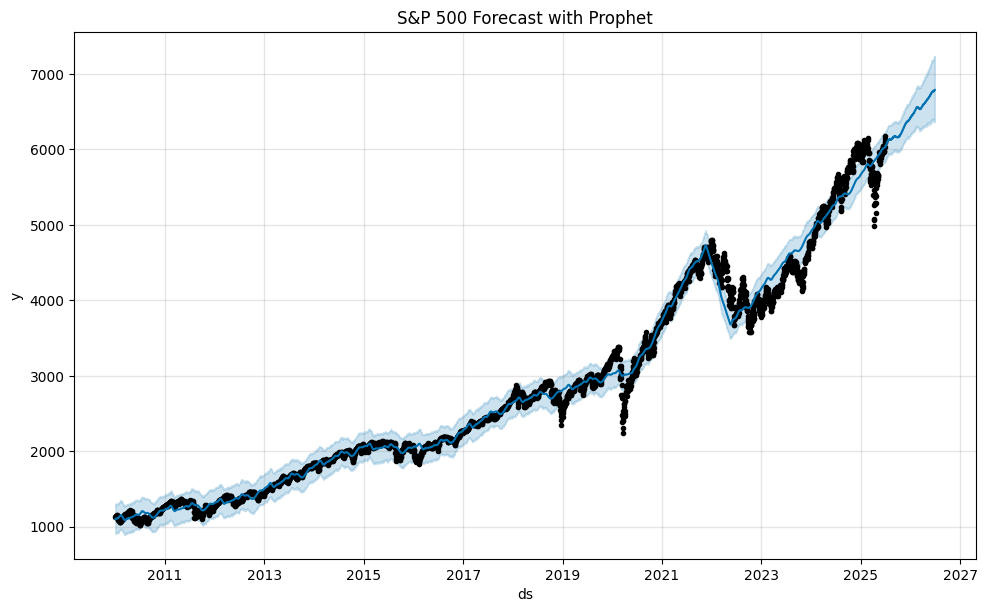

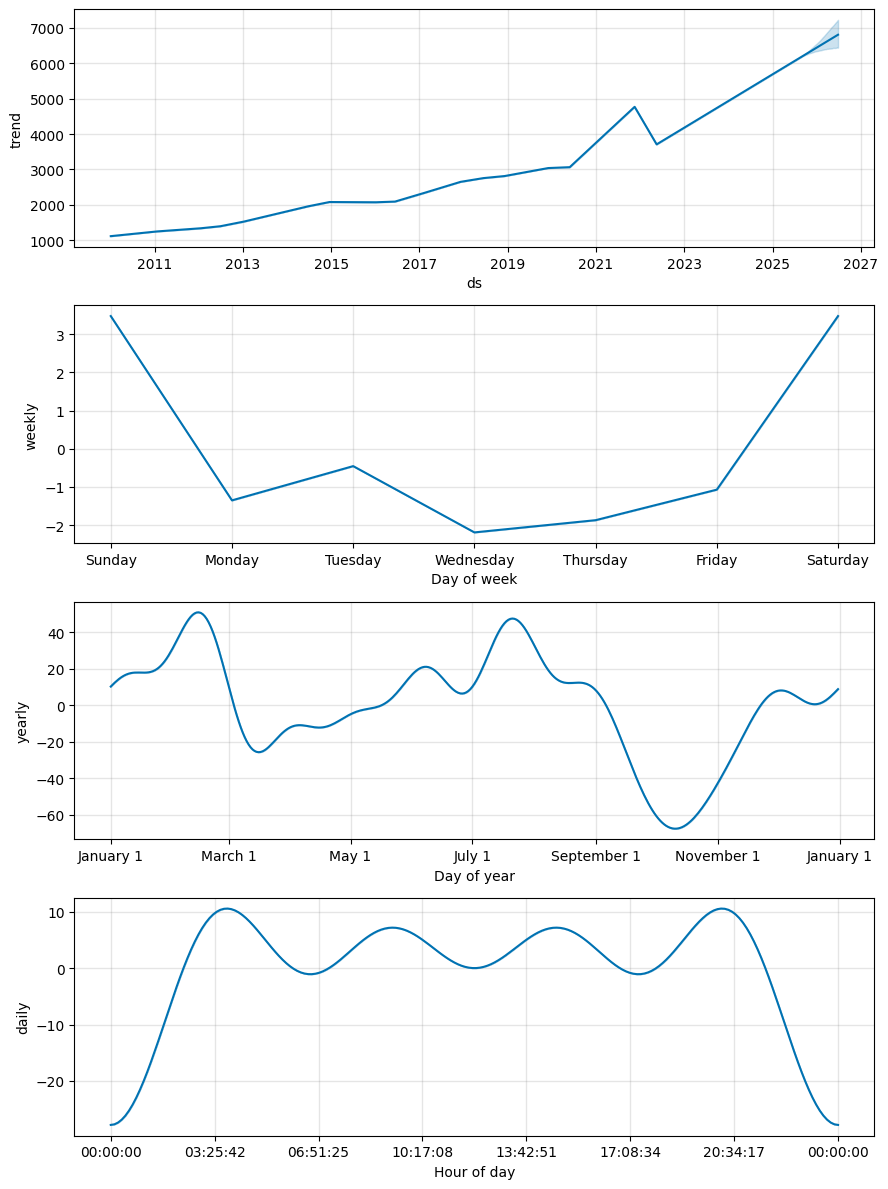

In [22]:
from prophet import Prophet

# Prepare data
df = close_price.reset_index()
df.columns = ['ds', 'y']

# Model
model = Prophet(daily_seasonality=True)
model.fit(df)

# Make future dataframe (365 days ahead)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('S&P 500 Forecast with Prophet')
plt.show()

# Plot trend + components
model.plot_components(forecast)
plt.show()

### Step 4: Deep Learning — LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0179
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6690e-04
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5384e-04
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3220e-04
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5136e-04
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2854e-04
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3770e-04
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.1881e-04
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.2274e-04
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.1836e-04
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.2058e-04
Epoch 12/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.3220e-04
Epoch 13/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.1465e-04
Epoch 14/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.0324e-04
Epoch 15/20
96/96 ━━━━━━

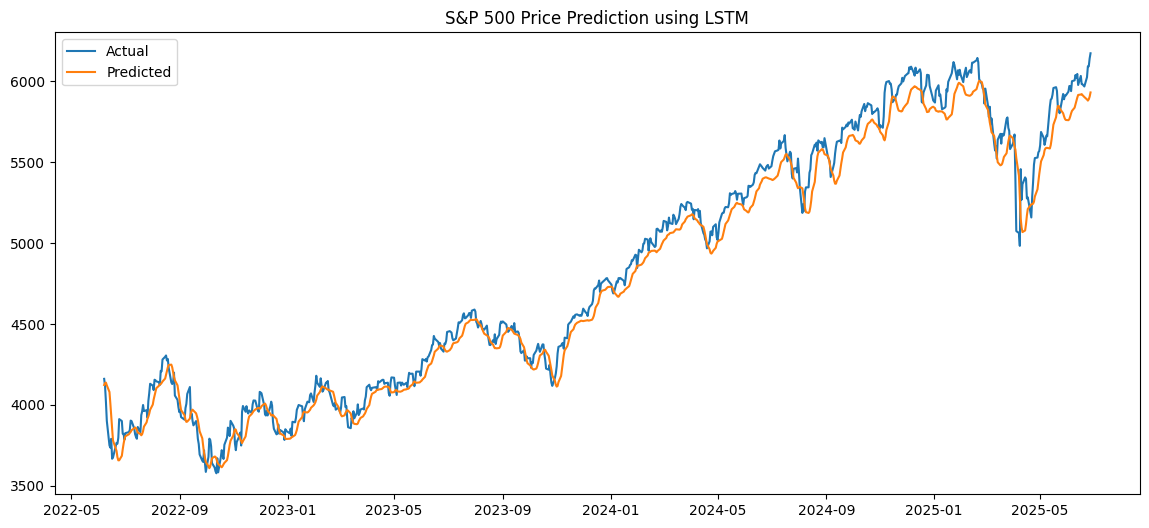

In [23]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Prepare data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_price.values.reshape(-1,1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split data
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

# Plot
plt.figure(figsize=(14,6))
plt.plot(close_price.index[-len(predicted):], close_price[-len(predicted):], label='Actual')
plt.plot(close_price.index[-len(predicted):], predicted, label='Predicted')
plt.title('S&P 500 Price Prediction using LSTM')
plt.legend()
plt.show()

## Step 7: Volatility Modeling

### 1: Volatility Estimation — Rolling Window

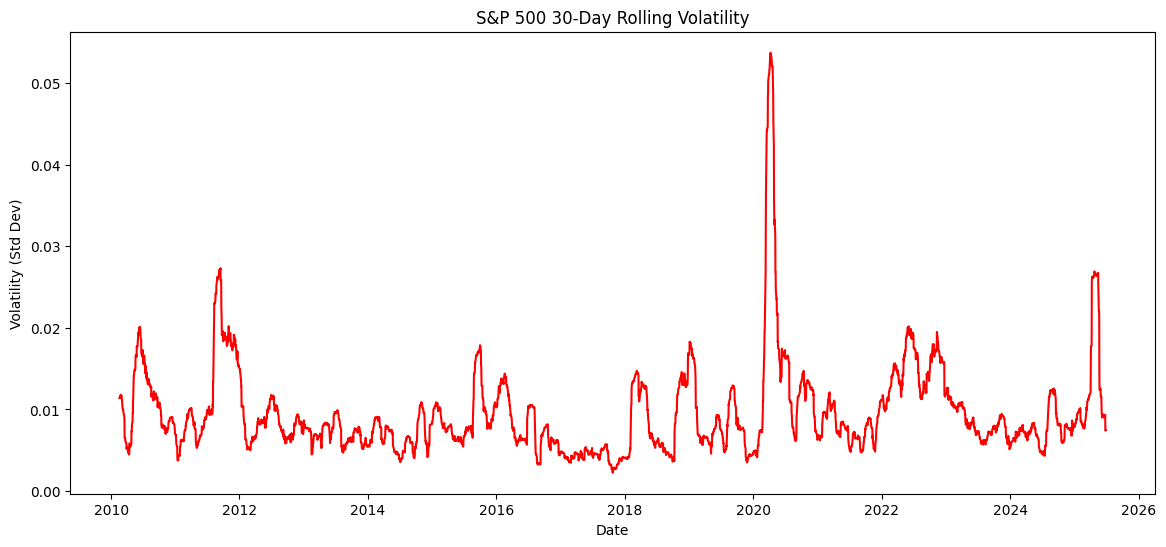

In [24]:
# Calculate daily returns
returns = close_price.pct_change().dropna()

# 30-day rolling standard deviation (volatility)
rolling_vol = returns.rolling(window=30).std()

# Plot
plt.figure(figsize=(14,6))
plt.plot(rolling_vol, color='red')
plt.title('S&P 500 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev)')
plt.show()

### 2: GARCH Model — Conditional Volatility Modeling

In [25]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 20.6 MB/s eta 0:00:00


✔️ Fit GARCH(1,1) Model:

In [26]:
from arch import arch_model

# Convert returns to percentage
returns_pct = returns * 100

# Fit GARCH(1,1)
garch_model = arch_model(returns_pct, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Close_^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5041.78
Distribution:                  Normal   AIC:                           10091.6
Method:            Maximum Likelihood   BIC:                           10116.6
                                        No. Observations:                 3894
Date:                Thu, Jul 03 2025   Df Residuals:                     3893
Time:                        14:36:04   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0821  1.213e-02      6.763  1.352e-11 [5.828e-0

✔️ Check Conditional Volatility Over Time:

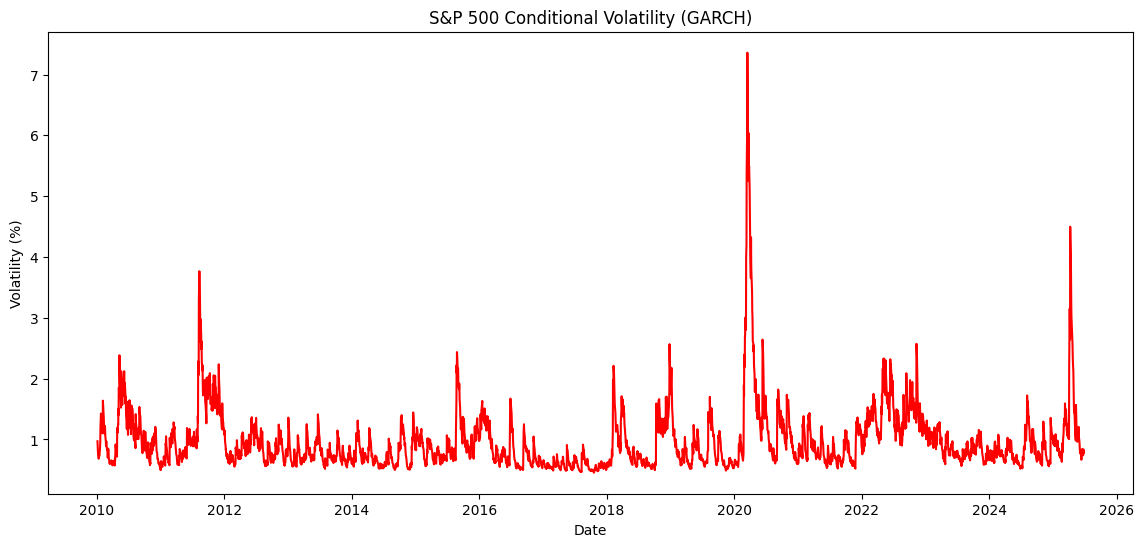

In [27]:
plt.figure(figsize=(14,6))
plt.plot(garch_fit.conditional_volatility, color='red')
plt.title('S&P 500 Conditional Volatility (GARCH)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.show()

### 3: Volatility Forecast

✔️ Forecast Next 30 Days of Volatility:

In [28]:
forecast = garch_fit.forecast(horizon=30)

# Forecasted variance for the last point
forecasted_variance = forecast.variance.iloc[-1]
forecasted_volatility = np.sqrt(forecasted_variance)

print('Forecasted Volatility for Next 30 Days:')
print(forecasted_volatility)

Forecasted Volatility for Next 30 Days:
h.01    0.745170
h.02    0.758305
h.03    0.770840
h.04    0.782815
h.05    0.794265
h.06    0.805224
h.07    0.815719
h.08    0.825778
h.09    0.835426
h.10    0.844685
h.11    0.853576
h.12    0.862118
h.13    0.870329
h.14    0.878225
h.15    0.885822
h.16    0.893134
h.17    0.900174
h.18    0.906955
h.19    0.913488
h.20    0.919785
h.21    0.925857
h.22    0.931711
h.23    0.937359
h.24    0.942809
h.25    0.948068
h.26    0.953146
h.27    0.958048
h.28    0.962782
h.29    0.967355
h.30    0.971773
Name: 2025-06-27 00:00:00, dtype: float64


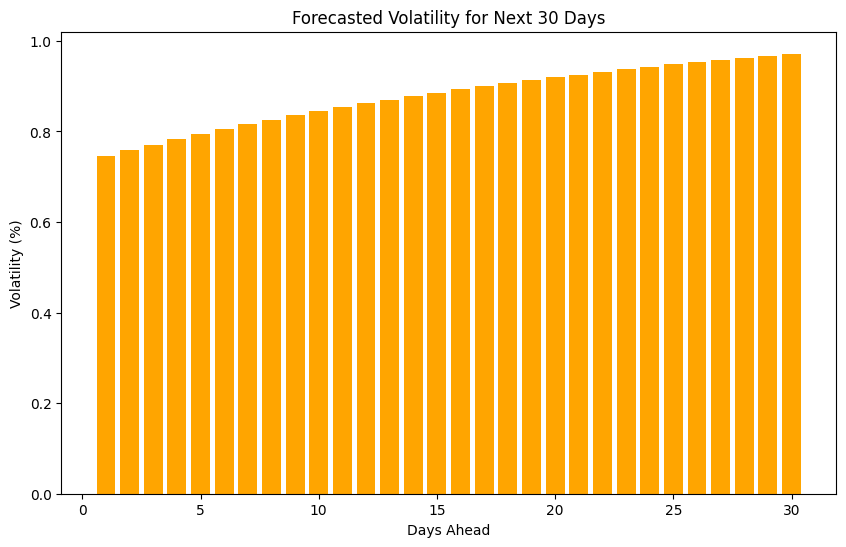

In [29]:
plt.figure(figsize=(10,6))
plt.bar(range(1,31), forecasted_volatility, color='orange')
plt.title('Forecasted Volatility for Next 30 Days')
plt.xlabel('Days Ahead')
plt.ylabel('Volatility (%)')
plt.show()

### 4: Volatility Clustering and Crash Detection

✔️ Detect High Volatility Periods:

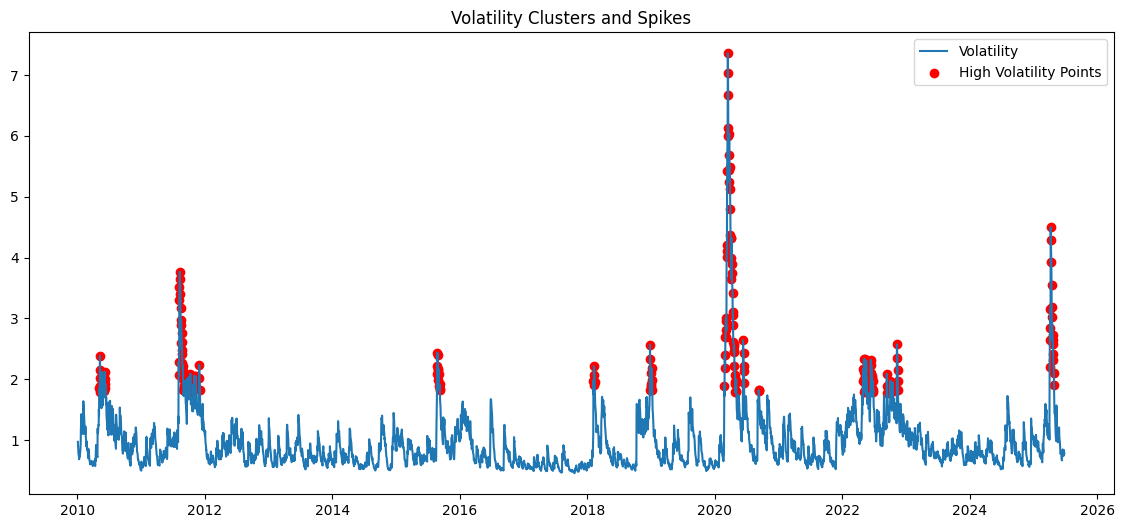

In [30]:
high_volatility = garch_fit.conditional_volatility[garch_fit.conditional_volatility > garch_fit.conditional_volatility.mean() + 1.5 * garch_fit.conditional_volatility.std()]

plt.figure(figsize=(14,6))
plt.plot(garch_fit.conditional_volatility, label='Volatility')
plt.scatter(high_volatility.index, high_volatility, color='red', label='High Volatility Points')
plt.title('Volatility Clusters and Spikes')
plt.legend()
plt.show()

## Step 8: Risk Metrics Analysis

### 1: Maximum Drawdown
Measures the worst historical loss from the highest peak to the next lowest valley before a full recovery.

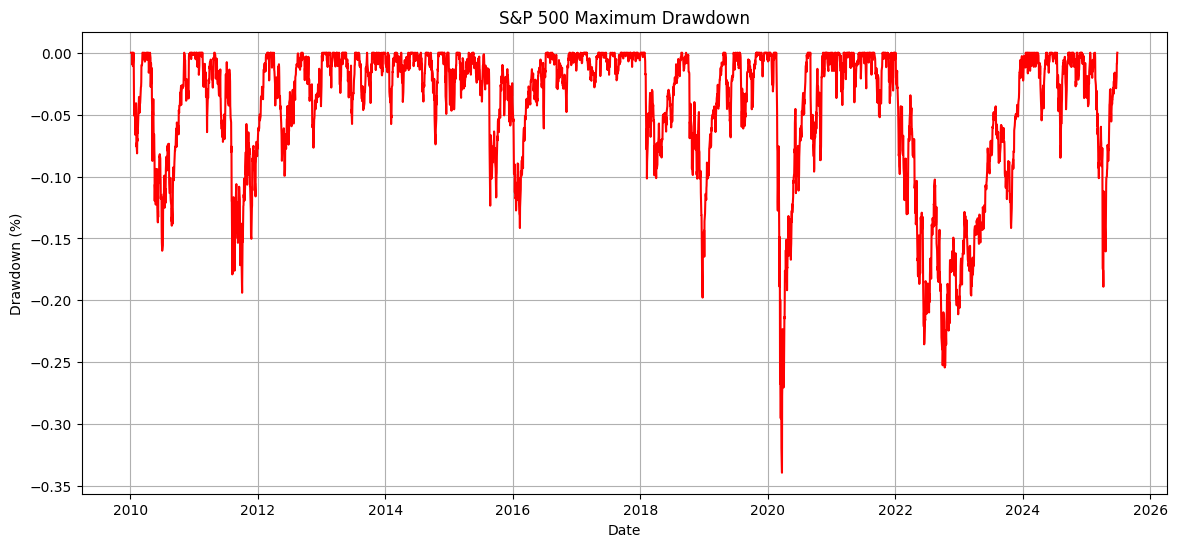

Maximum Drawdown: -33.92%


In [31]:
# Calculate running maximum
roll_max = close_price.cummax()

# Calculate drawdown
drawdown = (close_price - roll_max) / roll_max

# Plot drawdown
plt.figure(figsize=(14,6))
plt.plot(drawdown, color='red')
plt.title('S&P 500 Maximum Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.grid(True)
plt.show()

# Print max drawdown
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")

### 2: Sharpe Ratio
Measures risk-adjusted return.
The higher, the better (positive reward for risk taken).

✔️ Formula:
            Sharpe Ratio = Rp - Rf / σp
> Rp = average return of portfolio (daily),
> Rf = risk-free rate (assumed 0 for simplicity),
> σp = standard deviation of returns

In [34]:
# Daily returns
daily_returns = close_price.pct_change().dropna()

# Sharpe ratio (annualized)
sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)

# Interpretation
if sharpe_ratio < 1.0:
    interpretation = "Sub-optimal return"
elif 1.0 <= sharpe_ratio < 2.0:
    interpretation = "Acceptable"
elif 2.0 <= sharpe_ratio < 3.0:
    interpretation = "Good"
else:
    interpretation = "Excellent"

print(f"Sharpe Ratio (Annualized): {sharpe_ratio:.2f}")
print(f"Interpretation: {interpretation}")

Sharpe Ratio (Annualized): 0.71
Interpretation: Sub-optimal return


### 3: Value at Risk (VaR)
Measures the worst expected loss over a given time period at a specific confidence level.

✔️ Historical VaR (Simple Method):

In [35]:
confidence_level = 0.05
VaR_95 = np.percentile(daily_returns, 100 * confidence_level)

print(f"1-Day VaR (95% confidence): {VaR_95:.2%}")

1-Day VaR (95% confidence): -1.66%


✔️ Plot VaR Threshold:

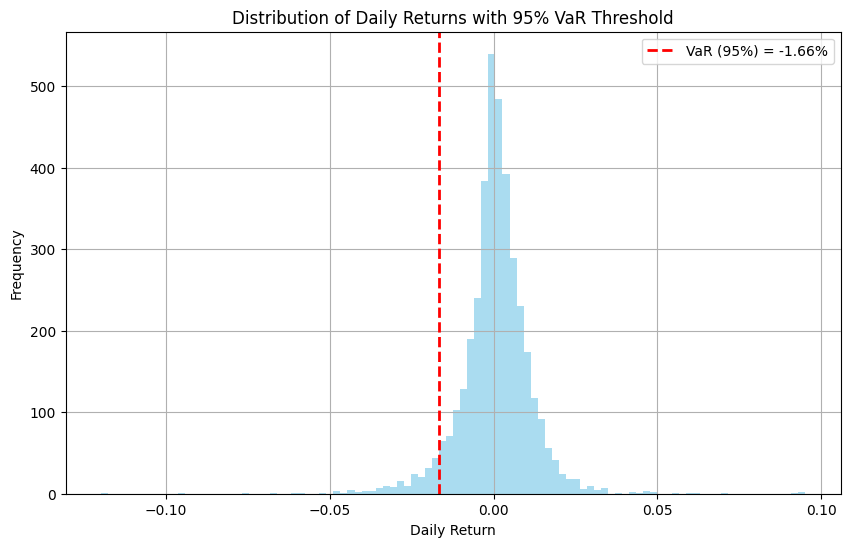

In [36]:
plt.figure(figsize=(10,6))
plt.hist(daily_returns, bins=100, alpha=0.7, color='skyblue')
plt.axvline(VaR_95, color='red', linestyle='dashed', linewidth=2, label=f"VaR (95%) = {VaR_95:.2%}")
plt.title('Distribution of Daily Returns with 95% VaR Threshold')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Conditional VaR (CVaR)
Expected loss beyond the VaR threshold.

In [37]:
CVaR_95 = daily_returns[daily_returns <= VaR_95].mean()
print(f"CVaR (Expected Shortfall) at 95%: {CVaR_95:.2%}")

CVaR (Expected Shortfall) at 95%: -2.67%


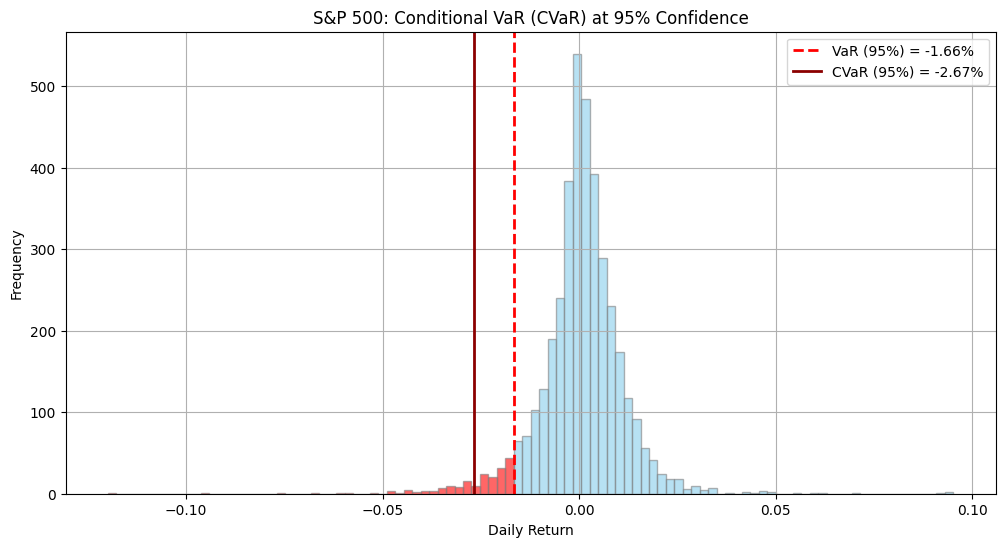

In [38]:
# Calculate daily returns
daily_returns = close_price.pct_change().dropna()

# Set confidence level (e.g., 95%)
confidence_level = 0.05
VaR_95 = np.percentile(daily_returns, 100 * confidence_level)

# Conditional VaR (CVaR) = mean of worst losses beyond VaR
CVaR_95 = daily_returns[daily_returns <= VaR_95].mean()

# Plot
plt.figure(figsize=(12,6))
n, bins, patches = plt.hist(daily_returns, bins=100, alpha=0.6, color='skyblue', edgecolor='gray')

# Shade area for CVaR
for patch, bin_edge in zip(patches, bins):
    if bin_edge < VaR_95:
        patch.set_facecolor('red')

# Add vertical lines
plt.axvline(VaR_95, color='red', linestyle='--', linewidth=2, label=f"VaR (95%) = {VaR_95:.2%}")
plt.axvline(CVaR_95, color='darkred', linestyle='-', linewidth=2, label=f"CVaR (95%) = {CVaR_95:.2%}")

# Labels and title
plt.title('S&P 500: Conditional VaR (CVaR) at 95% Confidence')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## Step 9: Anomaly & Crash Detection

### 1: Detect Return-Based Anomalies (Outliers)

Method: Z-score or Percentile-Based Outliers

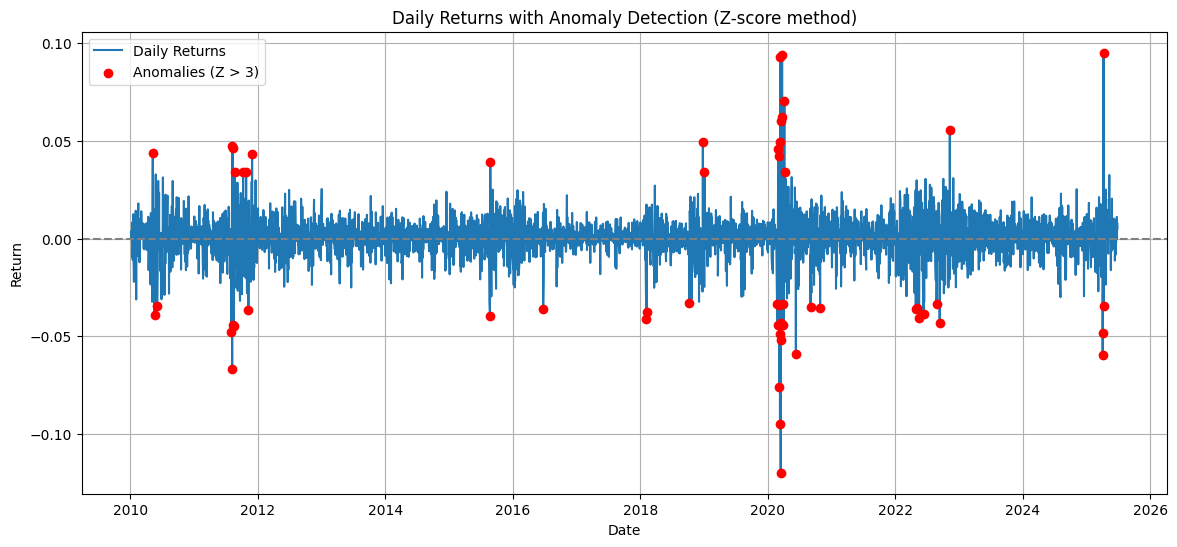

Detected 56 return anomalies (extreme spikes/drops)
Red points = extreme movements


In [41]:
# Calculate daily returns
daily_returns = close_price.pct_change().dropna()

# Calculate Z-scores
z_scores = (daily_returns - daily_returns.mean()) / daily_returns.std()

# Define anomaly threshold (e.g. Z < -3 or Z > 3)
anomaly_threshold = 3
return_anomalies = daily_returns[(z_scores > anomaly_threshold) | (z_scores < -anomaly_threshold)]

# Plot anomalies
plt.figure(figsize=(14,6))
plt.plot(daily_returns.index, daily_returns, label='Daily Returns')
plt.scatter(return_anomalies.index, return_anomalies, color='red', label='Anomalies (Z > 3)', zorder=5)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Daily Returns with Anomaly Detection (Z-score method)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

print(f"Detected {len(return_anomalies)} return anomalies (extreme spikes/drops)")
print("Red points = extreme movements")

### 2: Volatility Spike Detection
Method: GARCH Conditional Volatility

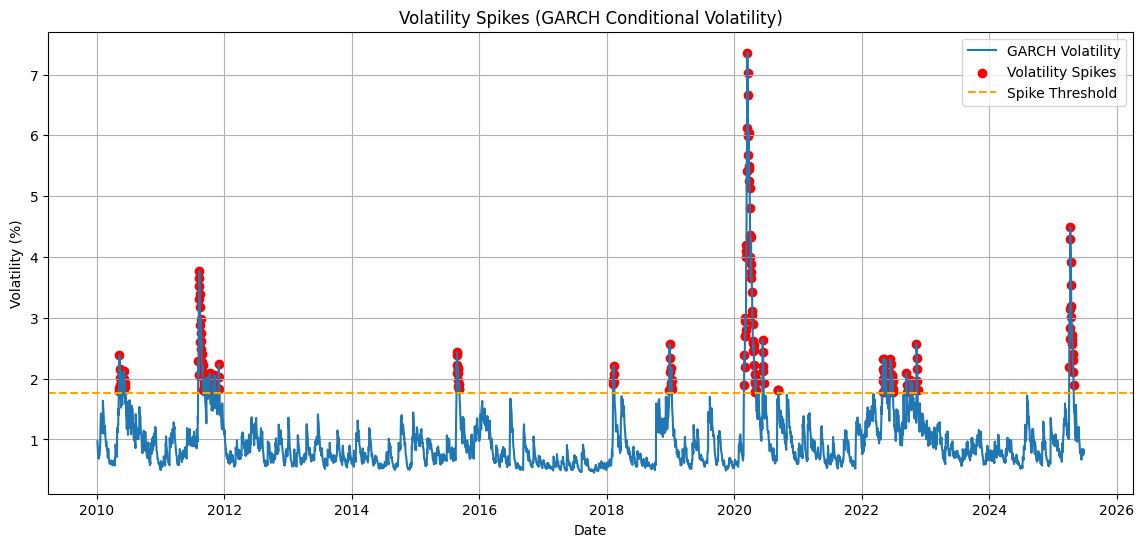

Detected 206 volatility spike days.
Red dots = market fear or uncertainty spikes.


In [43]:
# Get GARCH volatility
from arch import arch_model
returns_pct = daily_returns * 100
model = arch_model(returns_pct, vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')
volatility = garch_fit.conditional_volatility

# Define spike threshold: 1.5 std above mean
vol_threshold = volatility.mean() + 1.5 * volatility.std()
vol_spikes = volatility[volatility > vol_threshold]

# Plot
plt.figure(figsize=(14,6))
plt.plot(volatility, label='GARCH Volatility')
plt.scatter(vol_spikes.index, vol_spikes, color='red', label='Volatility Spikes')
plt.axhline(vol_threshold, color='orange', linestyle='--', label='Spike Threshold')
plt.title('Volatility Spikes (GARCH Conditional Volatility)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Detected {len(vol_spikes)} volatility spike days.")
print("Red dots = market fear or uncertainty spikes.")

### 3: Drawdown-Based Crash Detection
Method: Detect deep dips from all-time highs

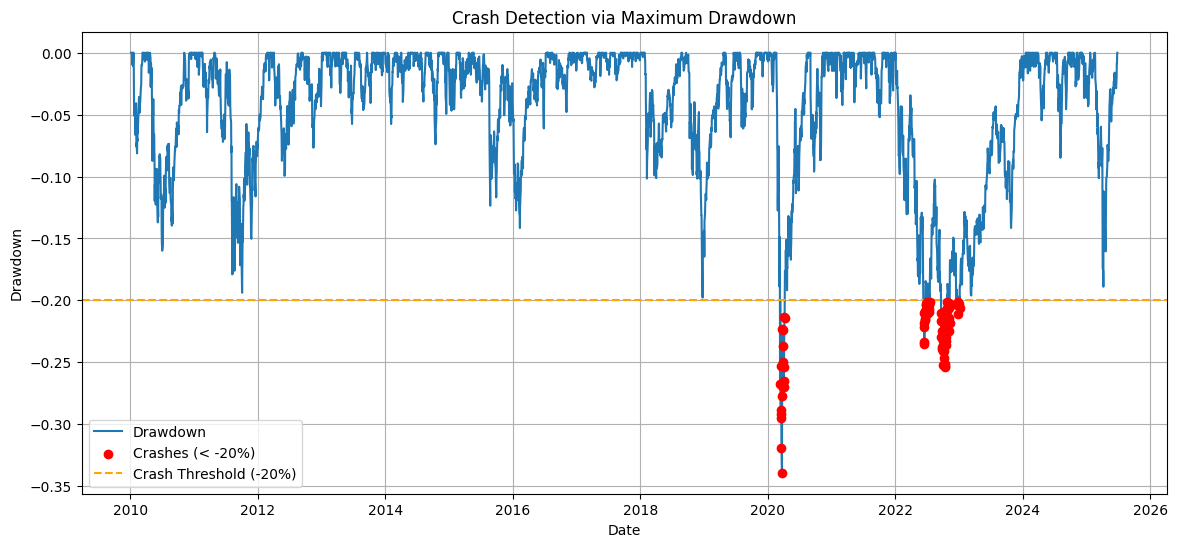

Detected 74 crash periods below -20% drawdown.


In [44]:
# Calculate drawdown
rolling_max = close_price.cummax()
drawdown = (close_price - rolling_max) / rolling_max

# Define crash threshold (e.g. -20%)
crash_threshold = -0.20
crashes = drawdown[drawdown < crash_threshold]

# Plot
plt.figure(figsize=(14,6))
plt.plot(drawdown, label='Drawdown')
plt.scatter(crashes.index, crashes, color='red', label='Crashes (< -20%)', zorder=5)
plt.axhline(crash_threshold, color='orange', linestyle='--', label='Crash Threshold (-20%)')
plt.title('Crash Detection via Maximum Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

print(f"Detected {len(crashes)} crash periods below -20% drawdown.")

### 4: Combine All Anomaly Events in a Table

In [46]:
# Step 1: Create base DataFrame from close_price index
anomaly_df = pd.DataFrame(index=close_price.index)

# Align all metrics to the same index using reindex
# Returns
anomaly_df['Return_Anomaly'] = daily_returns.isin(return_anomalies).reindex(anomaly_df.index, fill_value=False)

# Volatility (GARCH)
vol_series = volatility.reindex(anomaly_df.index, method='ffill')  # Forward fill missing values if needed
vol_spike_flags = vol_series > (vol_series.mean() + 1.5 * vol_series.std())
anomaly_df['Volatility_Spike'] = vol_spike_flags

# Drawdown
rolling_max = close_price.cummax()
drawdown = (close_price - rolling_max) / rolling_max
anomaly_df['Drawdown_Crash'] = drawdown < -0.20

combined_anomalies = anomaly_df[anomaly_df.any(axis=1)]
print("Combined anomaly dates:\n", combined_anomalies)

Combined anomaly dates:
             Return_Anomaly  Volatility_Spike  Drawdown_Crash
Date                                                        
2010-05-07           False              True           False
2010-05-10            True              True           False
2010-05-11           False              True           False
2010-05-12           False              True           False
2010-05-13           False              True           False
...                    ...               ...             ...
2025-04-23           False              True           False
2025-04-24           False              True           False
2025-04-25           False              True           False
2025-04-28           False              True           False
2025-04-29           False              True           False

[268 rows x 3 columns]


/tmp/ipython-input-47-3868134385.py:28: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


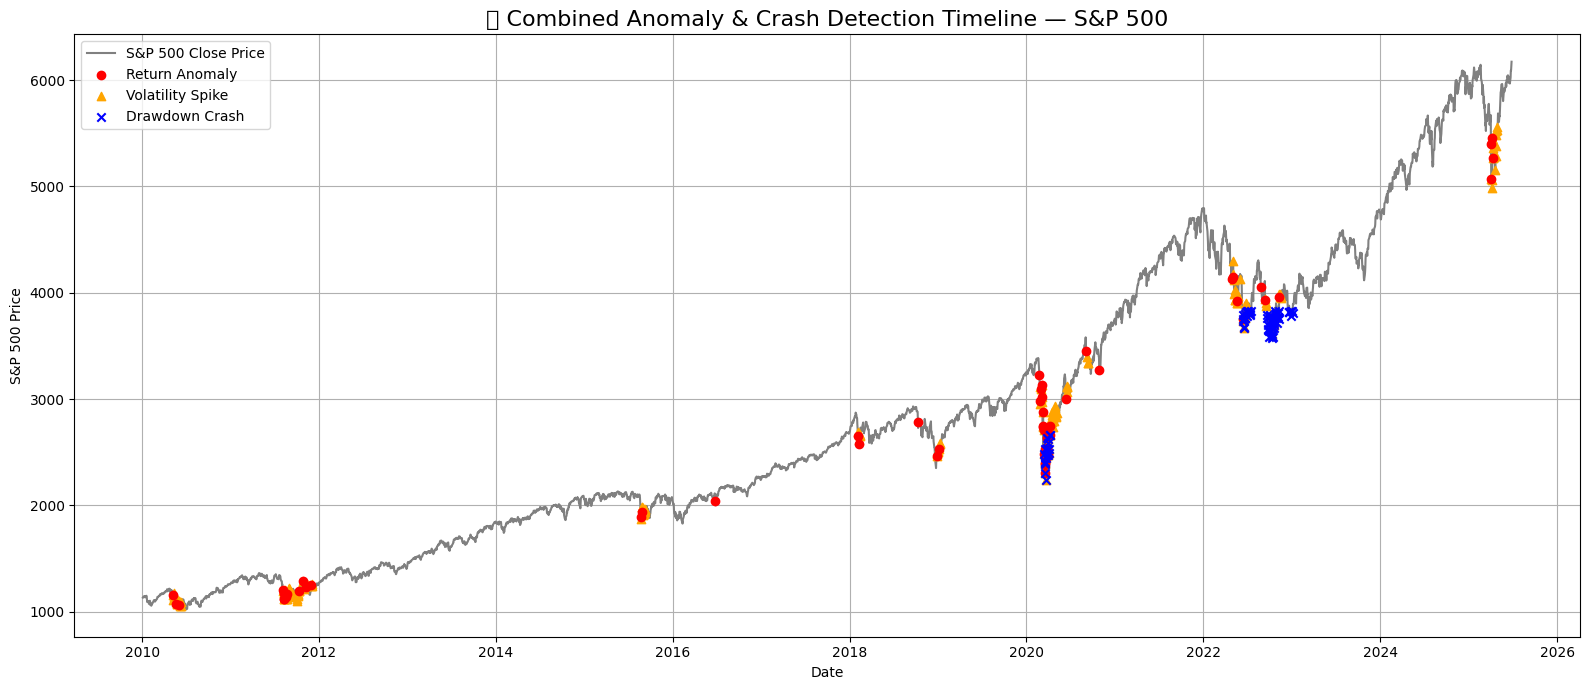

In [47]:
plt.figure(figsize=(16, 7))

# Plot Close Price as base
plt.plot(close_price.index, close_price, label='S&P 500 Close Price', color='gray', linewidth=1.5)

# Plot anomaly markers
# 1. Return Anomalies (Red Dots)
return_anomaly_dates = anomaly_df[anomaly_df['Return_Anomaly']].index
plt.scatter(return_anomaly_dates, close_price.loc[return_anomaly_dates],
            color='red', marker='o', label='Return Anomaly', zorder=5)

# 2. Volatility Spikes (Orange Dots)
vol_spike_dates = anomaly_df[anomaly_df['Volatility_Spike']].index
plt.scatter(vol_spike_dates, close_price.loc[vol_spike_dates],
            color='orange', marker='^', label='Volatility Spike', zorder=4)

# 3. Drawdown Crashes (Blue Dots)
crash_dates = anomaly_df[anomaly_df['Drawdown_Crash']].index
plt.scatter(crash_dates, close_price.loc[crash_dates],
            color='blue', marker='x', label='Drawdown Crash', zorder=6)

# Plot Styling
plt.title('📉 Combined Anomaly & Crash Detection Timeline — S&P 500', fontsize=16)
plt.xlabel('Date')
plt.ylabel('S&P 500 Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()